In [2]:
import matplotlib.pyplot as plt

import matplotlib.ticker as plticker
import numpy as np
import math
import random

In [74]:
size = 5
i,j=0,0
x,y,u,v,angles,anglesList =[],[],[],[],[],[]
while i <= size:
    j=0
    angles.append([])
    while j<= size:
        angle = random.random()*math.pi/2
        if j == 0:
            angle -= math.pi/2
        elif j < size/2:
            angle += math.pi
        elif j == size:
            angle += math.pi/2
        angle = angle % math.pi
        x.append(i)
        y.append(j)
        angles[i].append(angle)
        anglesList.append(angle)
        j=j+1
    i=i+1
angles[round(size/2-0.1)][round(size/2-0.1)] = math.pi
angles[round(size/2-0.1)][round(size/2+0.1)] = math.pi/2
angles[round(size/2+0.1)][round(size/2-0.1)] = 3*math.pi/2
angles[round(size/2+0.1)][round(size/2+0.1)] = 0
for row in angles:
    for angle in row:
        u.append(math.sin(angle))
        v.append(math.cos(angle))
for i in angles:
    print(i)

[1.772994524106922, 0.8692389846240127, 1.307496806237343, 0.3163928418554576, 0.4070948843986388, 3.1048097431390893]
[1.600414381410596, 0.6091135467400983, 0.9006338951980304, 0.11083975670288301, 1.5477663887088526, 1.6160886278054716]
[1.808914406370669, 0.004699050248579972, 3.141592653589793, 1.5707963267948966, 1.2167807848242307, 2.991881869038971]
[2.2644968553691713, 0.6406926765333898, 4.71238898038469, 0, 1.4447170675001473, 2.590876096393246]
[2.739841079639474, 1.4579780257290844, 0.4006055581385195, 1.3794409534621388, 0.4081505539550729, 1.6072858363892328]
[2.951150150515031, 1.11185989938675, 0.8711580791386506, 0.4494767009891108, 1.314861172168931, 3.0431844578635188]


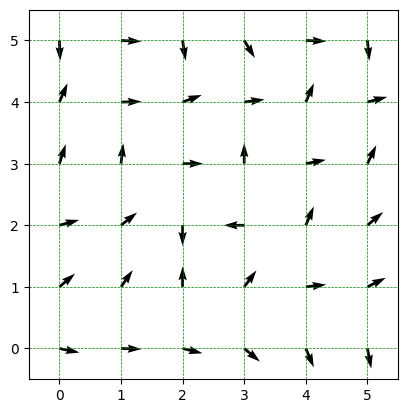

In [75]:
plt.quiver(x,y,u,v)
plt.axis('scaled')
plt.axis([-0.5,5.5,-0.5,5.5])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

/tmp/ipykernel_732/673901218.py:51: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  angleLine = plt.Line2D((-1,angleLineLength+1),(-1,-1),1.5,color='#613dc1')
/tmp/ipykernel_732/673901218.py:52: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  angleMarker = plt.Line2D((anglePoint,anglePoint),(-1.2,-0.8),1.5,color='#29339b')


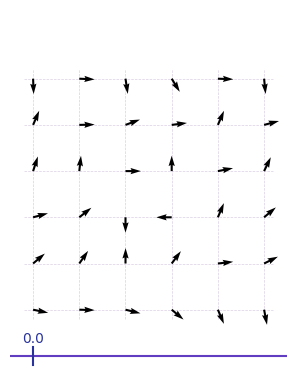

In [147]:
def twoAngleCompare(i1,j1,i2,j2,angles,close):
    if (0<=j2 <= size and 0 <= i2 <= size):
        if (abs(angles[i1][j1]-angles[i2][j2])<close):
                line = plt.Line2D((i1,i2),(j1,j2),1.5,color='#29339b')
                plt.gca().add_line(line)
            
def squareCompare(i,j,change,change2,angles,close):
    sites = [(i,j),(i,j+change2),(i+change,j),(i+change,j+change2)]
    diffs = []
    if (0<i+change <= size and 0< j+change2 <= size):
        for site1 in sites:
            for site2 in sites:  
                diff = abs(angles[site1[0]][site1[1]]-angles[site2[0]][site2[1]])
                diffs.append(diff)
        maxDiff= max(diffs)
        if (close > maxDiff):
            rectangle = plt.Rectangle((i,j), change, change2, fc='#93e1d8',zorder=-1)
            plt.gca().add_patch(rectangle)


def angleGrid(compare=0, clear=False):
    close=compare/100
    compare = str(compare)
    angleLineLength = size+1
    plt.scatter([-1,size+1],[-1,size+1])
    plt.quiver(x,y,u,v)
    plt.axis('scaled')
    plt.axis('off')
    plt.axis([-0.5,size+0.5,-1.5,angleLineLength+0.5])
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    i=0
    while i <=size:
        j=0
        while j<=size:
            for change in [-1,1]:
                twoAngleCompare(i,j,i+change,j,angles,close)
                twoAngleCompare(i,j,i,j+change,angles,close)
                for change2 in [-1,1]:
                    squareCompare(i,j,change,change2,angles,close)
            j+=1
        i+=1
    l = 0
    while (l <= size):
        axLine = plt.Line2D((l,l),(-0.2,size+0.2),linestyle = '--', linewidth = 0.5,color='#dacfe3',zorder=-100)
        axLine2 = plt.Line2D((-0.2,size+0.2),(l,l),linestyle = '--', linewidth = 0.5,color='#dacfe3',zorder=-100)
        plt.gca().add_line(axLine)
        plt.gca().add_line(axLine2)
        l+=1
        
    anglePoint = angleLineLength*close/(2*math.pi) 
    angleLine = plt.Line2D((-1,angleLineLength+1),(-1,-1),1.5,color='#613dc1')
    angleMarker = plt.Line2D((anglePoint,anglePoint),(-1.2,-0.8),1.5,color='#29339b')
    plt.gca().add_line(angleLine)    
    plt.gca().add_line(angleMarker)
    plt.text(anglePoint,-0.7,round(close,2),horizontalalignment='center',color='#29339b')
    plt.savefig('./imagesVideo/angleGrid/AngleGrid'+compare+'.png',bbox_inches='tight',pad_inches = 0,transparent=True)
    if clear:
        plt.clf()

angleGrid()


In [148]:
i=0
while i <= 500:
    angleGrid(i,True)
    i+= 1

/tmp/ipykernel_732/673901218.py:51: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  angleLine = plt.Line2D((-1,angleLineLength+1),(-1,-1),1.5,color='#613dc1')
/tmp/ipykernel_732/673901218.py:52: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  angleMarker = plt.Line2D((anglePoint,anglePoint),(-1.2,-0.8),1.5,color='#29339b')
/tmp/ipykernel_732/673901218.py:4: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  line = plt.Line2D((i1,i2),(j1,j2),1.5,color='#29339b')


<Figure size 640x480 with 0 Axes>

In [30]:
import numpy as np
import gudhi as gd  

In [42]:
positions = np.array([[u, v] for u in x for v in y])
filt_values = np.array(angles)
filt_values

array([[1.90962511, 1.83907206, 2.78133816, 3.11423664, 2.72901843,
        1.92943008],
       [2.49887114, 1.03811723, 1.99643955, 0.16647941, 1.58843435,
        2.73991775],
       [2.64824313, 2.86070133, 2.38968942, 1.89578859, 1.05404831,
        2.94229186],
       [0.41357655, 2.07824159, 0.37242055, 0.5095358 , 0.82225781,
        1.20582133],
       [2.37773462, 2.64913893, 0.01128921, 1.91849143, 1.02254536,
        0.58872381],
       [0.05567285, 1.9920133 , 0.7742131 , 1.82439716, 2.1714891 ,
        1.68412165]])

In [48]:
cc_density_crater = gd.CubicalComplex(
    top_dimensional_cells = filt_values
)

In [43]:
cc_density_crater.cofaces_of_persistence_pairs()

[[array([[34, 27],
         [19, 26],
         [ 5, 11],
         [ 7, 13],
         [ 3,  9]]),
  array([[23, 22],
         [ 4, 10],
         [ 2,  8]])],
 [array([16])]]

<Axes: title={'center': 'Persistence barcode'}>

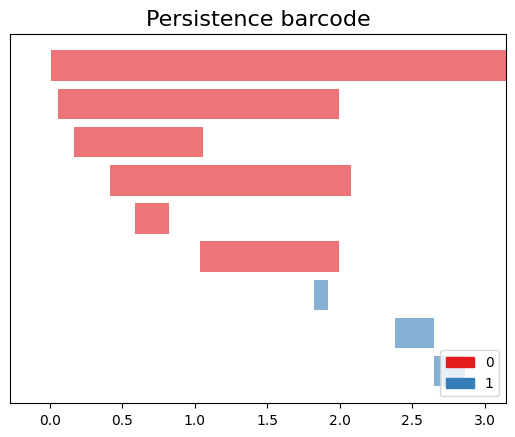

In [34]:
gd.plot_persistence_barcode(cc_density_crater.persistence(),legend=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

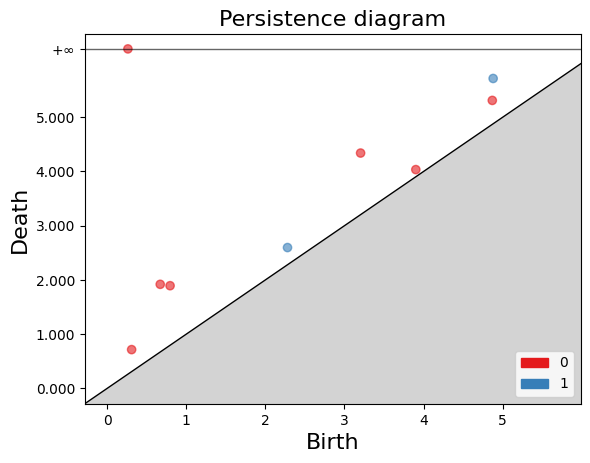

In [11]:
gd.plot_persistence_diagram(cc_density_crater.persistence(),legend=True)